<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/main/ML/LearningCurves_logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Synthetic data set.

In [26]:
# Number of samples
n_samples = 10000

# Number of features
n_features = 4

In [27]:
# Create a feature matrix

X = np.random.rand(n_samples, n_features)

y = np.random.randint(0, 2, n_samples)

In [28]:
print(X.shape)

(10000, 4)


In [29]:
print(y.shape)

(10000,)


# KFold cross validation

In [30]:
# Define the number of folds
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

### In Python, a generator is a type of iterable, like lists or tuples. However, unlike lists, generators do not store their contents in memory; instead, they generate values on the fly and `yield` them one at a time, using the yield keyword.

In [31]:
type(kf.split(X))

generator

In [32]:
model_logreg = LogisticRegression(max_iter=1000, random_state=42)


In [33]:
# Lists to store the MSE scores

training_accuracy_scores = []
validation_accuracy_scores = []

In [34]:
for train_index, val_index in kf.split(X):
  #print(f"Validation indices: {val_index}")
  #print(f"Training indices: {train_index}")
  # Extract the training and validation sets
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  # Train the model
  model_logreg.fit(X_train, y_train)

  # Predict on the training set and calculate MSE
  y_train_pred = model_logreg.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  training_accuracy_scores.append(train_accuracy)

  # Predict on the validation set and calculate MSE
  y_val_pred = model_logreg.predict(X_val)
  val_accuracy = accuracy_score(y_val, y_val_pred)
  validation_accuracy_scores.append(val_accuracy)





In [35]:
print(training_accuracy_scores)
print(validation_accuracy_scores)

[0.519, 0.5146666666666667, 0.5145555555555555, 0.5135555555555555, 0.5167777777777778, 0.5153333333333333, 0.511, 0.5138888888888888, 0.5175555555555555, 0.516]
[0.48, 0.531, 0.509, 0.531, 0.506, 0.519, 0.523, 0.482, 0.51, 0.51]


`Mean squared error (MSE) is not a suitable metric for evaluating a logistic regression model.`

#### `Logistic regression` `is used for classification tasks, and the appropriate metrics for evaluating a classification model include accuracy, precision, recall, F1 score, and area under the ROC curve (AUC), among others.`

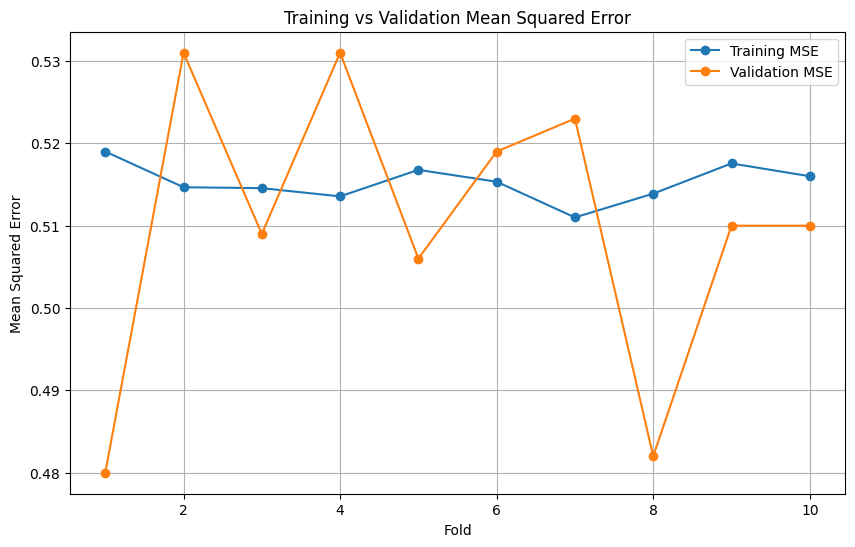

In [36]:
# Plot the training MSE vs validation MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), training_accuracy_scores, marker='o', label='Training MSE')
plt.plot(range(1, k+1), validation_accuracy_scores, marker='o', label='Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

#### Observation from plots

- **`Model is overfitting (high training accuracy but low validation accuracy)`**

- One reason could be because this is a random dataset.
- Since there is no relation between datapoints, probably it is dfficult to get the predictions right, without defined relationship between depedent and independent variables.
- Another observation is, since the dataset is random, every time the curves changes as the data generated is random.